In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [51]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(12,8)

In [52]:
df=pd.read_csv(r'Datos\gpu_metadata.csv')
df2=pd.read_csv(r'Datos\gpu_price_history.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     48 non-null     object
 1   Wattage  48 non-null     object
 2   VRAM     48 non-null     object
 3   3DMARK   48 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1087 non-null   object
 1   Name          1087 non-null   object
 2   Retail Price  1087 non-null   int64 
 3   Used Price    1087 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.1+ KB


### A partir de la informacion obtenida del DF2, se observa que las fechas se encuentran en formato object, esto evitara futuras filtraciones por fecha, el tipo de dato se cambiara a datetime

In [55]:
df2["Date"]=pd.to_datetime(df2["Date"], format="%d-%m-%y",)

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1087 non-null   datetime64[ns]
 1   Name          1087 non-null   object        
 2   Retail Price  1087 non-null   int64         
 3   Used Price    1087 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.1+ KB


### Se hace una prueba para verificar que no existan fechas fuera de rango actual

In [60]:
fechas=df2[df2["Date"]>="2024-12-24"] #buscar alguna fecha que sea pasado el 12 de diciembre de 2024
fechas.head(20)

,Date,Name,Retail Price,Used Price


In [61]:
df.head()

,Name,Wattage,VRAM,3DMARK
0,GeForce GTX 1050,75W,2GB,1861
1,GeForce GTX 1050 Ti,75W,4GB,2356
2,GeForce GTX 1060,120W,6GB,4215
3,GeForce GTX 1650,75W,4GB,3552
4,GeForce GTX 1660 SUPER,125W,6GB,6078


In [62]:
df2.head()

,Date,Name,Retail Price,Used Price
0,2024-01-01,GeForce GTX 1050,0,0
1,2024-02-01,GeForce GTX 1050,0,0
2,2023-03-01,GeForce GTX 1050,192,61
3,2024-03-01,GeForce GTX 1050,254,52
4,2023-04-01,GeForce GTX 1050,181,55


In [38]:
df.describe()

,3DMARK
count,48.000000
mean,12561.916667
std,8629.770759
min,1195.000000
25%,4816.250000
50%,11561.500000
75%,19288.250000
max,35966.000000


In [39]:
df2.describe() #los resultados de muestran que existen elementos con precios en 0 lo cual deberia ser imposible para el precio de una tarjeta grafica

,Retail Price,Used Price
count,1087.000000,1087.000000
mean,478.281509,312.383625
std,412.893707,306.037560
min,0.000000,0.000000
25%,211.500000,90.000000
50%,339.000000,235.000000
75%,611.000000,425.000000
max,2229.000000,2119.000000


In [ ]:
duplicados=df2.duplicated().sum()
print(f'la cantida de registros duplicados es : {duplicados}') #no existen registros duplicados en la tabla de precios

la cantida de registros duplicados es : 0


In [ ]:
duplicados=df.duplicated().sum()
print(f'la cantida de registros duplicados es : {duplicados}') #no existen duplicados en la tabla de metadatos

la cantida de registros duplicados es : 0


In [65]:
df_ceros=df2[df2['Retail Price']==0]
df_ceros.info() #Se encuentra que existen 62 registros donde Retail Price es 0

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 927
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          62 non-null     datetime64[ns]
 1   Name          62 non-null     object        
 2   Retail Price  62 non-null     int64         
 3   Used Price    62 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.4+ KB


In [66]:
tarjetas=df_ceros['Name'].unique()

In [67]:
for tarjeta in tarjetas:
    Total=df_ceros[df_ceros['Name']==tarjeta]
    print(Total)
    #El resultado obtenido demuestra que tambien existen elementos de Used Price con valores en 0

         Date              Name  Retail Price  Used Price
0  2024-01-01  GeForce GTX 1050             0           0
1  2024-02-01  GeForce GTX 1050             0           0
18 2023-11-01  GeForce GTX 1050             0           0
20 2023-12-01  GeForce GTX 1050             0           0
         Date                 Name  Retail Price  Used Price
22 2024-01-01  GeForce GTX 1050 Ti             0           0
23 2024-02-01  GeForce GTX 1050 Ti             0           0
40 2023-11-01  GeForce GTX 1050 Ti             0           0
42 2023-12-01  GeForce GTX 1050 Ti             0           0
         Date              Name  Retail Price  Used Price
45 2024-01-01  GeForce GTX 1060             0          73
47 2024-02-01  GeForce GTX 1060             0          75
49 2024-03-01  GeForce GTX 1060             0          71
51 2024-04-01  GeForce GTX 1060             0          70
53 2024-05-01  GeForce GTX 1060             0          68
55 2024-06-01  GeForce GTX 1060             0          66

In [68]:
for tarje in df2['Name'].unique():
    print(df2[df2['Name']==tarje])


         Date              Name  Retail Price  Used Price
0  2024-01-01  GeForce GTX 1050             0           0
1  2024-02-01  GeForce GTX 1050             0           0
2  2023-03-01  GeForce GTX 1050           192          61
3  2024-03-01  GeForce GTX 1050           254          52
4  2023-04-01  GeForce GTX 1050           181          55
5  2024-04-01  GeForce GTX 1050           254          52
6  2023-05-01  GeForce GTX 1050           162          62
7  2024-05-01  GeForce GTX 1050           254          52
8  2023-06-01  GeForce GTX 1050           176          54
9  2024-06-01  GeForce GTX 1050           254          52
10 2023-07-01  GeForce GTX 1050           190          52
11 2024-07-01  GeForce GTX 1050           254          52
12 2023-08-01  GeForce GTX 1050           179          51
13 2024-08-01  GeForce GTX 1050           254          52
14 2023-09-01  GeForce GTX 1050           174          52
15 2024-09-01  GeForce GTX 1050           254          52
16 2023-10-01 

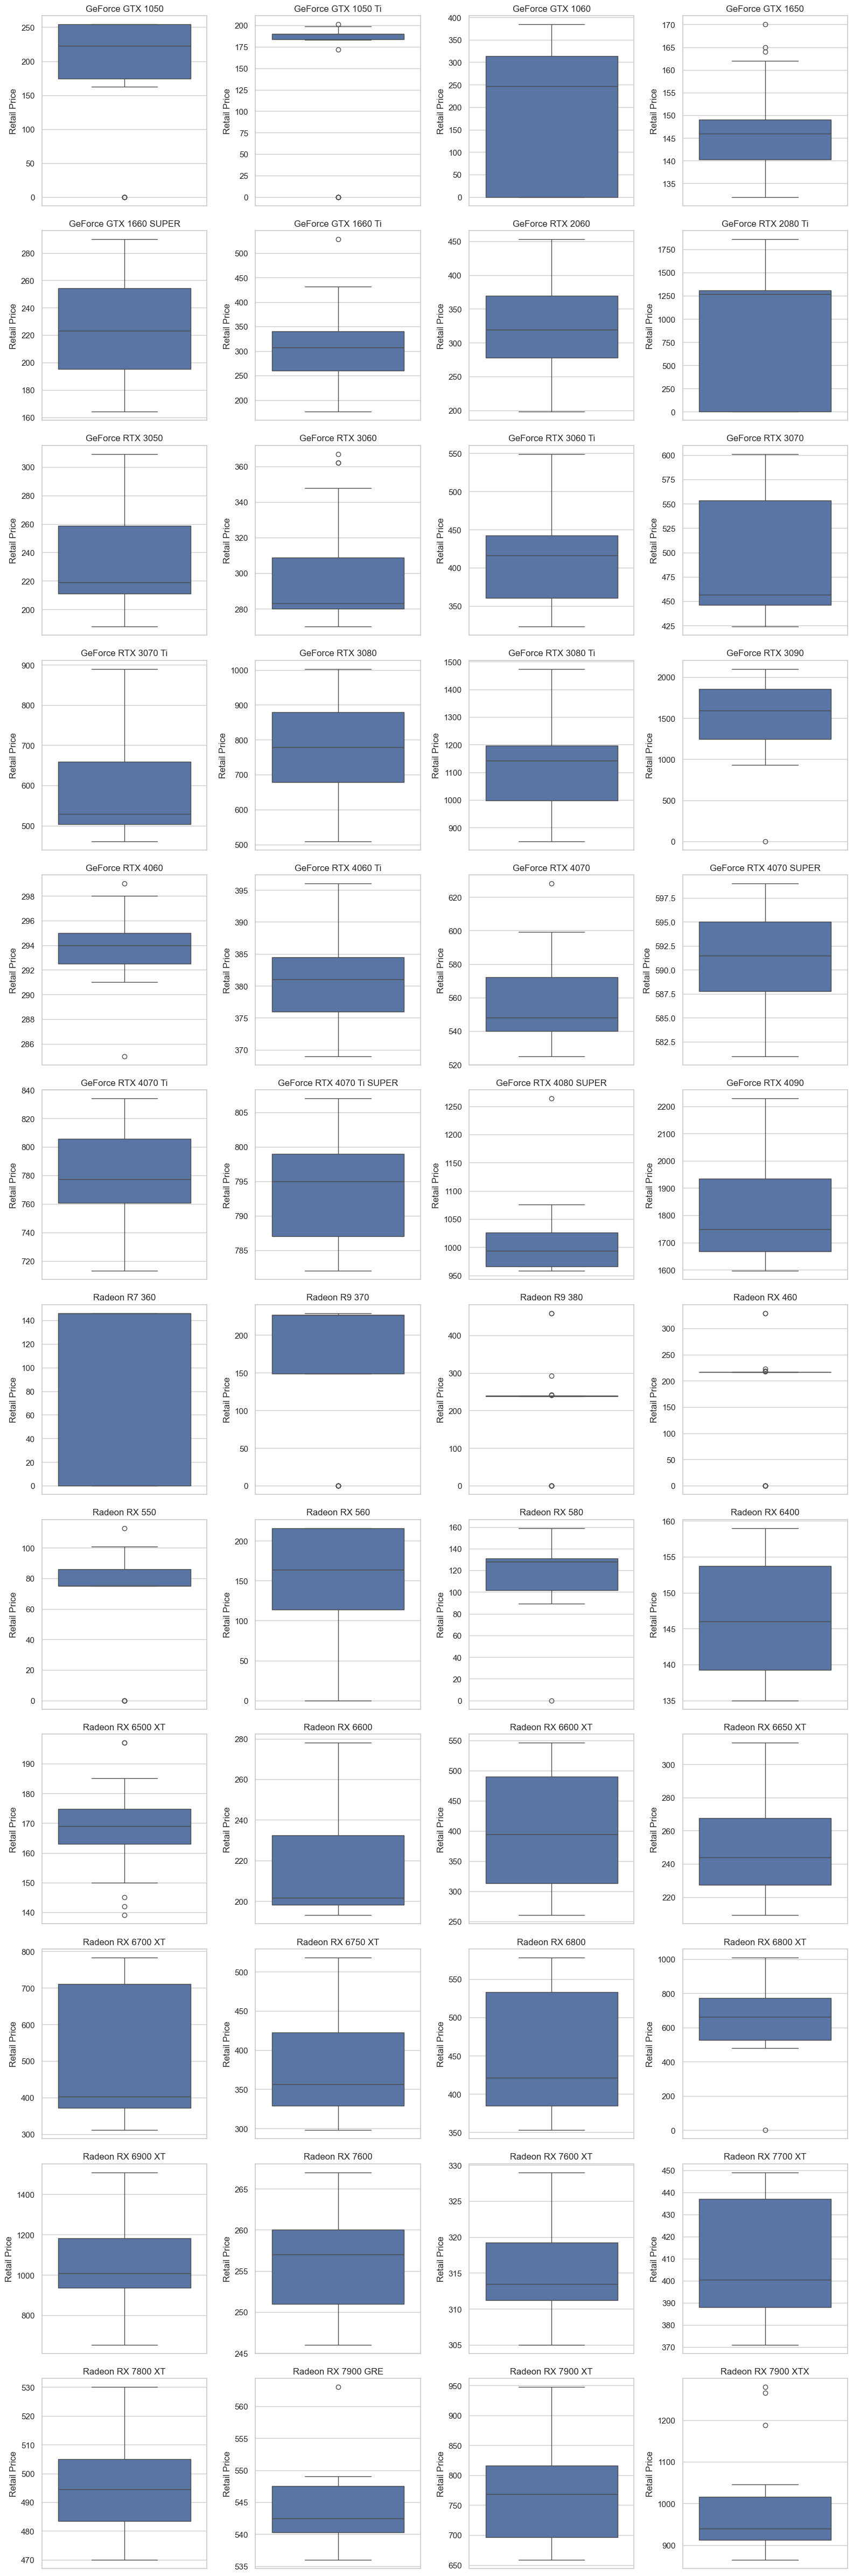

In [69]:
#Observamos los outliers de cada tarjeta grafica
categorias=df2['Name'].unique()
n=len(categorias)
cols=4
rows=math.ceil(n/cols)

fig, axes=plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes=axes.flatten()

for i, cat in enumerate(categorias):
    sns.boxplot(y=df2[df2['Name']==cat]['Retail Price'], ax=axes[i])
    axes[i].set_title(cat)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Retail Price')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [70]:
df2['Retail Price'].isnull().sum() #el resultado muestra que no existen valores faltantes, sin embargo los graficos de cajas muestran que exiten valores en 0

np.int64(0)

## Tratamiento de valores faltantes o valores en 0

### Se cambian los valores en 0 a valores tipo NaN para ser reconocidos como nulos y poder rellenar su informacion con los nuevos precios

In [71]:
df2["Retail Price"]=df2["Retail Price"].replace(0,np.nan)
df2["Used Price"]=df2["Used Price"].replace(0,np.nan)
df2.head(10)

,Date,Name,Retail Price,Used Price
0,2024-01-01,GeForce GTX 1050,NaN,NaN
1,2024-02-01,GeForce GTX 1050,NaN,NaN
2,2023-03-01,GeForce GTX 1050,192.0,61.0
3,2024-03-01,GeForce GTX 1050,254.0,52.0
4,2023-04-01,GeForce GTX 1050,181.0,55.0
5,2024-04-01,GeForce GTX 1050,254.0,52.0
6,2023-05-01,GeForce GTX 1050,162.0,62.0
7,2024-05-01,GeForce GTX 1050,254.0,52.0
8,2023-06-01,GeForce GTX 1050,176.0,54.0
9,2024-06-01,GeForce GTX 1050,254.0,52.0


### Ordenamos el dataframe por fechas y por tarjetas para tener un mejor panorama de como tratar los valore faltantes

In [74]:
df2=df2.sort_values(by=["Name","Date"])
df2.head(20)

,Date,Name,Retail Price,Used Price
2,2023-03-01,GeForce GTX 1050,192.0,61.0
4,2023-04-01,GeForce GTX 1050,181.0,55.0
6,2023-05-01,GeForce GTX 1050,162.0,62.0
8,2023-06-01,GeForce GTX 1050,176.0,54.0
10,2023-07-01,GeForce GTX 1050,190.0,52.0
12,2023-08-01,GeForce GTX 1050,179.0,51.0
14,2023-09-01,GeForce GTX 1050,174.0,52.0
16,2023-10-01,GeForce GTX 1050,254.0,52.0
18,2023-11-01,GeForce GTX 1050,NaN,NaN
20,2023-12-01,GeForce GTX 1050,NaN,NaN


### Se hara el tratamiento de los valores nulos por medio del metodo de interpolacion, para ello es que se ha ordenado previamente los datos por fechas y por categoria

In [76]:
df2["Retail Price"]=df2.groupby("Name")["Retail Price"].transform(lambda x: x.interpolate(method="linear"))
df2["Used Price"]=df2.groupby("Name")["Used Price"].transform(lambda x: x.interpolate(method="linear"))

### El resultado del tratamiento de los valores nulos es el siguiente

In [77]:
df2.head(20)

,Date,Name,Retail Price,Used Price
2,2023-03-01,GeForce GTX 1050,192.0,61.0
4,2023-04-01,GeForce GTX 1050,181.0,55.0
6,2023-05-01,GeForce GTX 1050,162.0,62.0
8,2023-06-01,GeForce GTX 1050,176.0,54.0
10,2023-07-01,GeForce GTX 1050,190.0,52.0
12,2023-08-01,GeForce GTX 1050,179.0,51.0
14,2023-09-01,GeForce GTX 1050,174.0,52.0
16,2023-10-01,GeForce GTX 1050,254.0,52.0
18,2023-11-01,GeForce GTX 1050,254.0,52.0
20,2023-12-01,GeForce GTX 1050,254.0,52.0


### A pesar de que se han tratado la mayoria de valores nulos aun existen algunos, en este caso, son valores al inicio de cada categoria ordenada por fecha, por lo cual la interpolacion lineal no tiene valores de referencia para hacer la sustitución

In [92]:
df2.isna().sum()

Date             0
Name             0
Retail Price     6
Used Price      19
dtype: int64

In [101]:
df4=df2[df2["Retail Price"].isnull()]
df5=df2[df2["Used Price"].isnull()]

In [159]:
df5.head(10)

,Date,Name,Retail Price,Used Price
413,2023-06-01,GeForce RTX 4060,299.0,NaN
415,2023-07-01,GeForce RTX 4060,297.0,NaN
417,2023-08-01,GeForce RTX 4060,291.0,NaN
432,2023-06-01,GeForce RTX 4060 Ti,385.0,NaN
434,2023-07-01,GeForce RTX 4060 Ti,383.0,NaN
436,2023-08-01,GeForce RTX 4060 Ti,376.0,NaN
449,2023-04-01,GeForce RTX 4070,628.0,NaN
467,2024-01-01,GeForce RTX 4070 SUPER,599.0,NaN
468,2024-02-01,GeForce RTX 4070 SUPER,595.0,NaN
479,2023-01-01,GeForce RTX 4070 Ti,816.0,NaN


In [89]:
df4

,Date,Name,Retail Price,Used Price
552,2023-03-01,Radeon R7 360,NaN,41.0
554,2023-04-01,Radeon R7 360,NaN,46.0
556,2023-05-01,Radeon R7 360,NaN,52.0
574,2023-03-01,Radeon R9 370,NaN,151.0
596,2023-03-01,Radeon R9 380,NaN,52.0
618,2023-03-01,Radeon RX 460,NaN,65.0


In [114]:
df3=df2[df2["Name"]=="GeForce RTX 4060 Ti"]

In [158]:
df3.head(10)

,Date,Name,Retail Price,Used Price
432,2023-06-01,GeForce RTX 4060 Ti,385.0,NaN
434,2023-07-01,GeForce RTX 4060 Ti,383.0,NaN
436,2023-08-01,GeForce RTX 4060 Ti,376.0,NaN
438,2023-09-01,GeForce RTX 4060 Ti,382.0,394.0
440,2023-10-01,GeForce RTX 4060 Ti,371.0,371.0
442,2023-11-01,GeForce RTX 4060 Ti,370.0,349.0
444,2023-12-01,GeForce RTX 4060 Ti,381.0,387.0
427,2024-01-01,GeForce RTX 4060 Ti,385.0,392.0
428,2024-02-01,GeForce RTX 4060 Ti,376.0,365.0
429,2024-03-01,GeForce RTX 4060 Ti,382.0,376.0


### Despues del analisis, para los valores nulos, dado que son valores al inicio de cada categoria, se utilizara el metodo "bfill" de esta manera se podra realizar un analisis posterior, sin embargo es necesario recalcar que existira una pequeña variacion entre el Retail Price y Used price para al menos 2 categorias

In [125]:
df2["Retail Price"]=df2.groupby("Name")["Retail Price"].transform(lambda x: x.bfill())
df2["Used Price"]=df2.groupby("Name")["Used Price"].transform(lambda x: x.bfill())

### A continuacion se hace la comprobacion de los valores nulos

In [126]:
df2.isnull().sum()

Date            0
Name            0
Retail Price    0
Used Price      0
dtype: int64

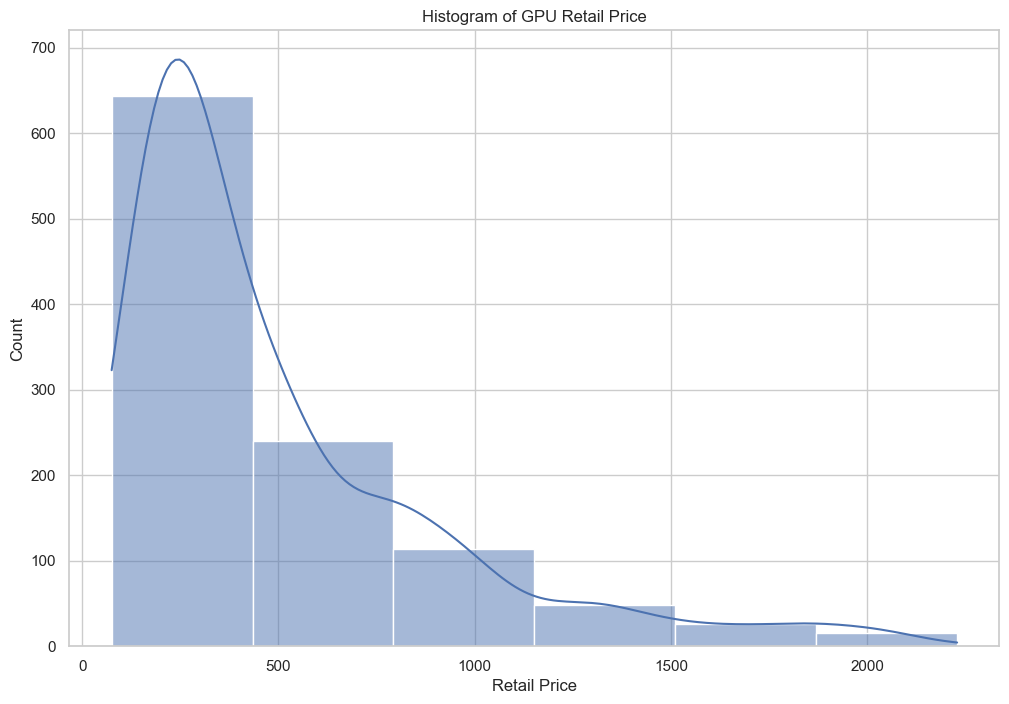

In [ ]:
sns.histplot(df2['Retail Price'],bins=6 ,kde=True)
plt.title('Histogram of GPU Retail Price')
plt.show()  # El hisograma muestra que el principal precio de venta de las gpu es menor a $1000

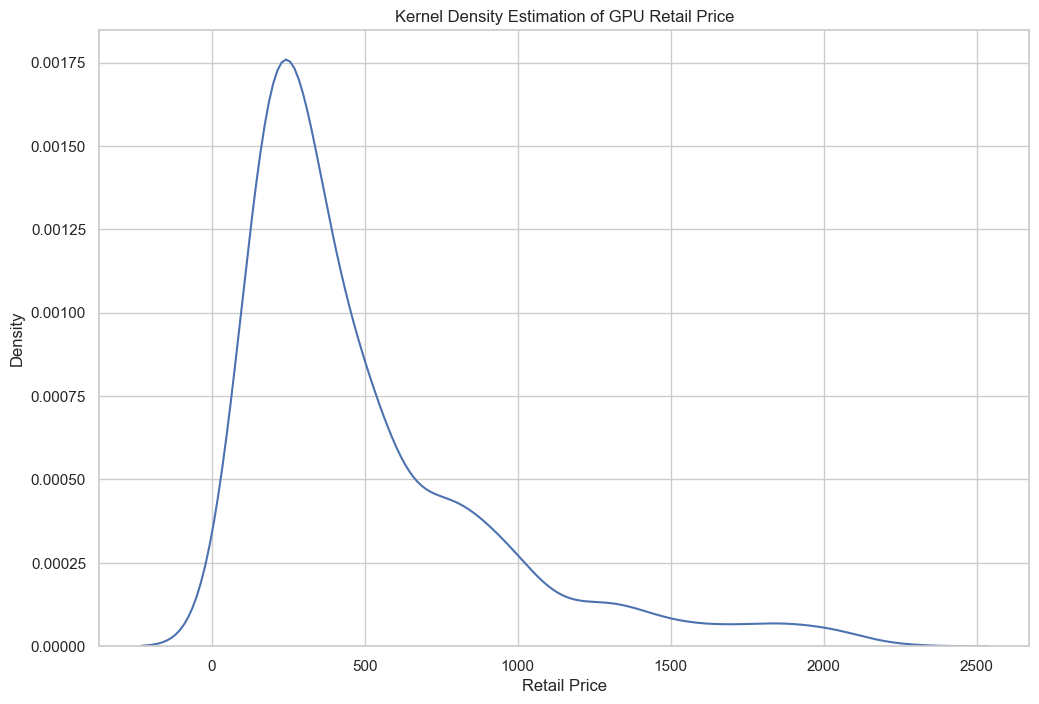

In [ ]:
sns.kdeplot(df2['Retail Price'])
plt.title('Kernel Density Estimation of GPU Retail Price') # El grafico KDE muestra que ya lamoria de las GPUs tienen un precio de venta menor a 1000 dolares
plt.show() 

In [22]:
dfradeon=df2[df2['Name'].str.contains('Radeon')]

In [27]:
dfgeforce=df2[df2['Name'].str.contains('GeForce')]

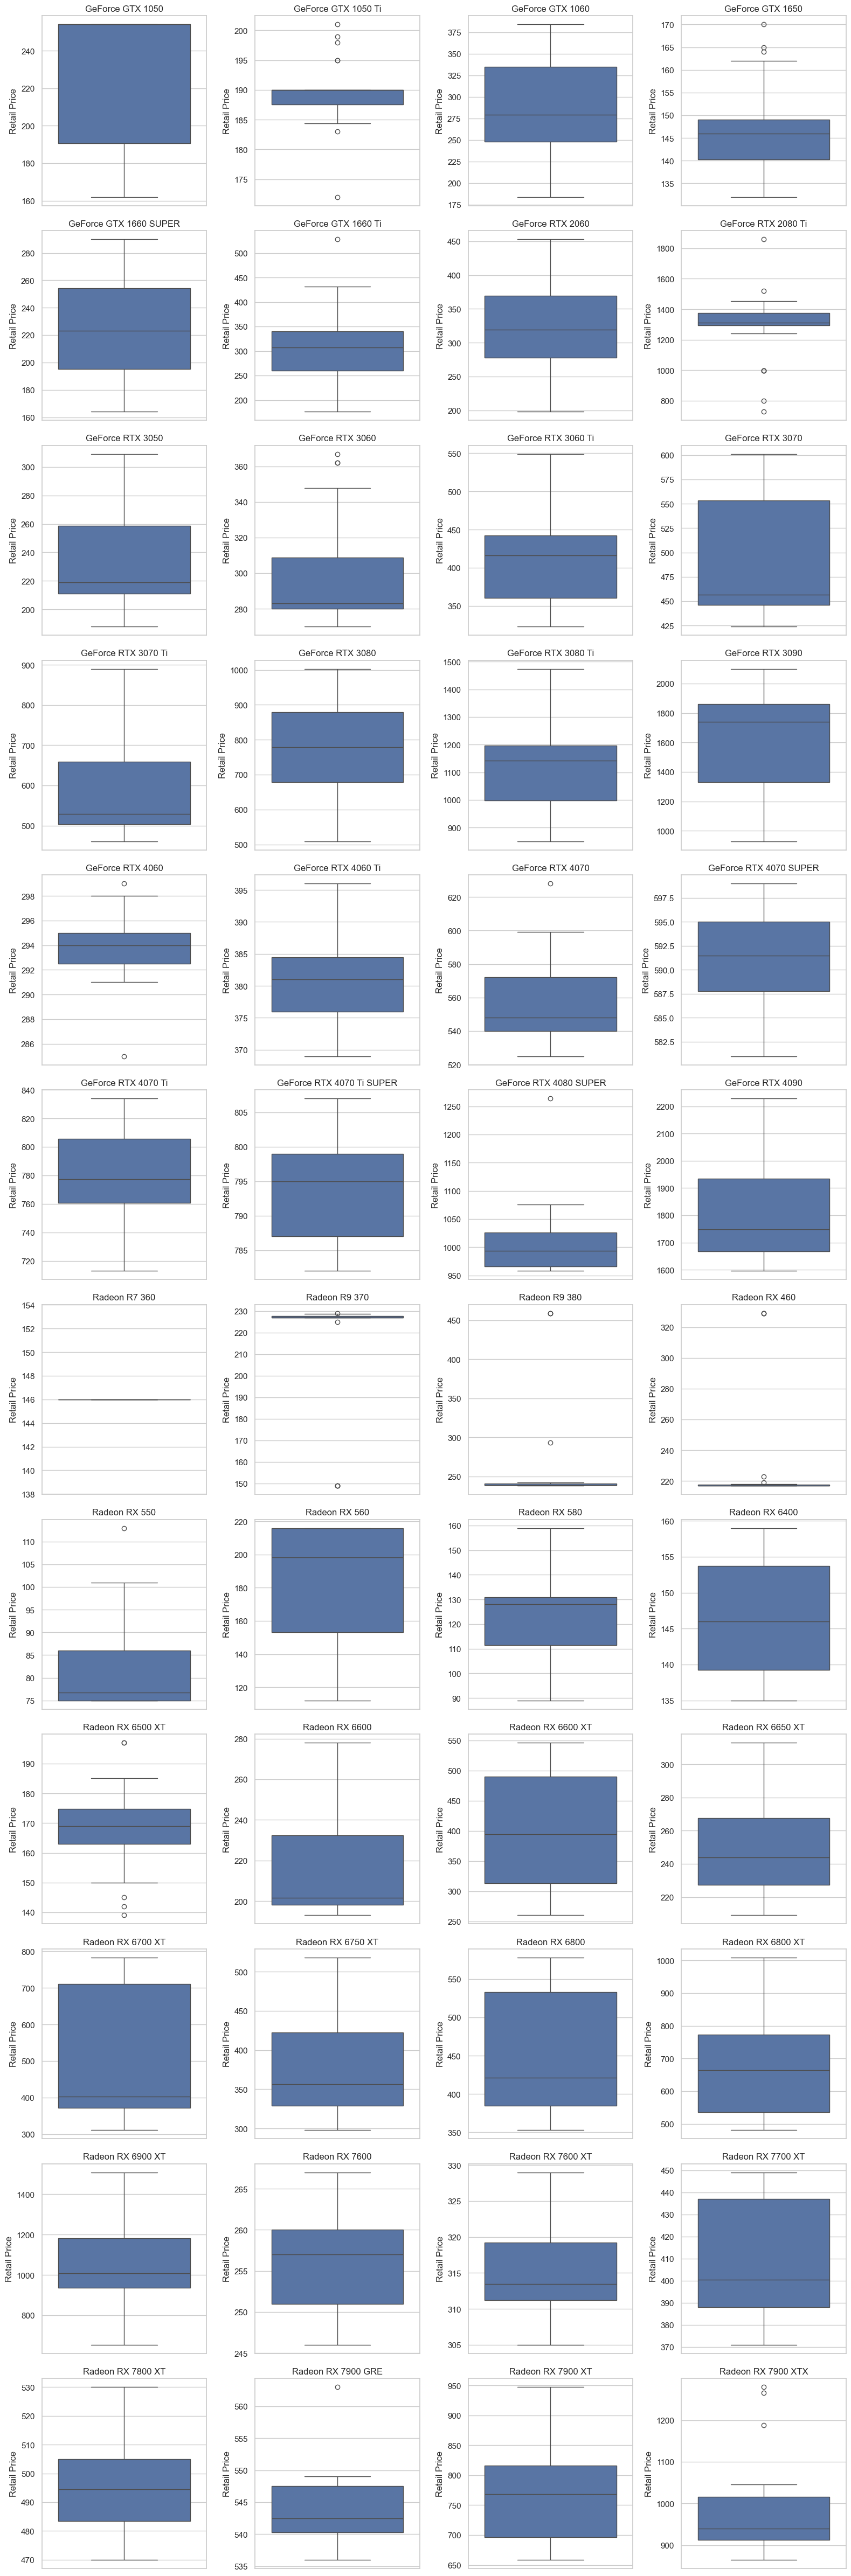

In [ ]:
#Observamos si existen outliers luego de haber rellenado los valores nulos
categorias=df2['Name'].unique()
n=len(categorias)
cols=4
rows=math.ceil(n/cols)

fig, axes=plt.subplots(rows, cols, figsize=(cols*4, rows*4))
axes=axes.flatten()

for i, cat in enumerate(categorias):
    sns.boxplot(y=df2[df2['Name']==cat]['Retail Price'], ax=axes[i])
    axes[i].set_title(cat)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Retail Price')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Con la Informacion tratada podemos observar una mejora en los boxplot para, sin embargo aun podemos visualizar algunos outlier, se ha optado por no modificar la informacion debido a las caracteristicas de las tarjetas graficas, estas segun su rendimiento y el uso que se le de puede llegar a tener subas o caidas drasticas de precio.

### Se procedera a realizar algunos cambios en la tabla de metadatos para su posterior uso

In [137]:
df=df.rename(columns={"Wattage":"Wattage(W)","VRAM":"VRAM(GB)"}) # Cambio en los nombres de las columnas

### Se removeran los sufijos "W" y "GB" y se convertiran los valores a Enteros

In [ ]:
df["Wattage(W)"] = df["Wattage(W)"].str.replace("W", "").astype(int)  ### Reemplazamos el nombre de la columna y convertimos los valores a enteros
df["VRAM(GB)"] = df["VRAM(GB)"].str.replace("GB", "").astype(int)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        48 non-null     object
 1   Wattage(W)  48 non-null     int64 
 2   VRAM(GB)    48 non-null     int64 
 3   3DMARK      48 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


### Con los nuevos cambios realizaremos un analisis estadistico general de la tabla de metadatos

In [ ]:
df.describe()

### se observa un promedio de consumo de energia, asi como la cantidad de memoria y el puntaje en benchmarking

,Wattage(W),VRAM(GB),3DMARK
count,48.000000,48.000000,48.000000
mean,200.958333,10.187500,12561.916667
std,94.543463,5.774693,8629.770759
min,50.000000,2.000000,1195.000000
25%,123.750000,6.000000,4816.250000
50%,190.000000,8.000000,11561.500000
75%,268.500000,13.000000,19288.250000
max,450.000000,24.000000,35966.000000


### Correlacion entre las variables de WATTAGE, VRAM Y 3DMARK

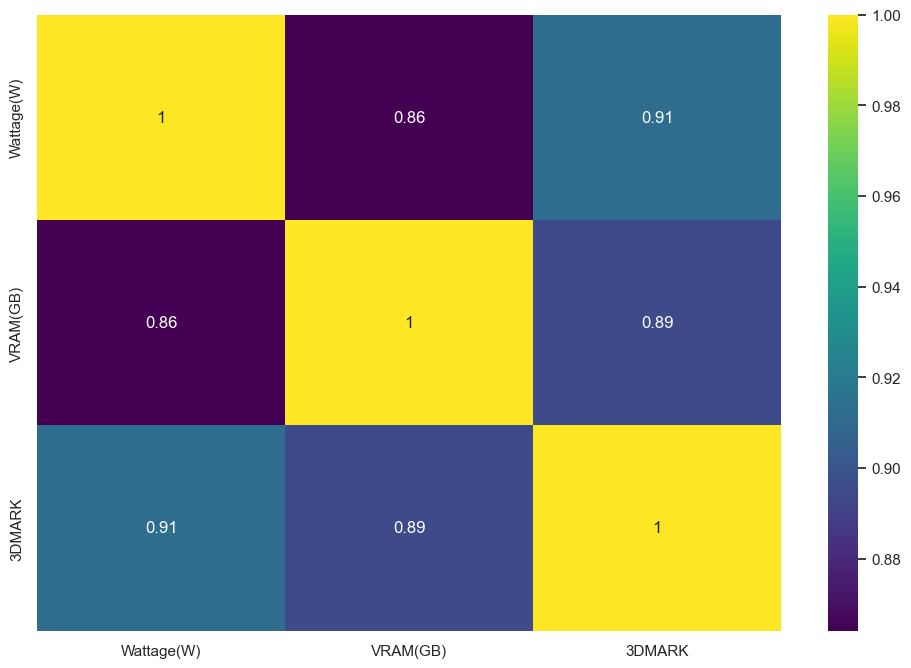

In [148]:
df_tarjetas=df.set_index("Name") #se convierte el nombre de la tarjeta a indice
corr=df_tarjetas.corr()#obtenemos la correlacion de las columnas numericas
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

### Los resultados del mapa de calor demuestra que existe una relacion entre su puntaje en 3DMARK con el consumo energetico la tarjeta, donde es de ligeramente menor relevancia su memoria.

### Se realizaran los graficos de correlacion entre las diferentes variables 

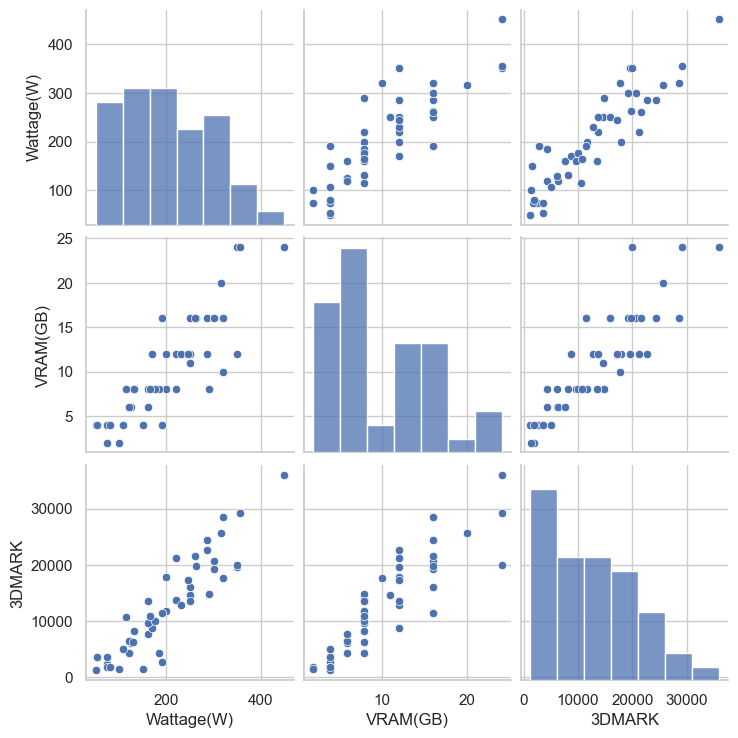

In [150]:
sns.pairplot(df)
plt.show()

### Se guardan los dataframes procesados en nuevos documentos 

In [161]:
df2.to_csv("Datosprocesados/Prices.csv", index=False)

In [162]:
df.to_csv("Datosprocesados/Metadatos.csv", index=False)

### Con la informacion procesada se procedera a realizar un dashboard